In [1]:
import math
import matplotlib
from numpy import *
from pylab import *
from scipy.integrate import ode

## Aufgaben zu elektrischen Ferldern von diskreten Ladungsverteilungen

Zur Bearbetung der Aufgaben stehen Ihnen folgende Programmcodes zur Verfügung. Durch die einzelnen Schritte können Sie für eine gegebene diskrete Ladungsverteilung die resultierenden elektrische Feldstärke visualisieren, ohne die einzelnen mathematischen Operationen ausführen zu müssen. 

Zuerst definieren wir eine Klasse mit der wir arbeiten. Die Klasse der Ladung beinhaltet die Postition und die Größe der Ladung. Mehr brauchen wir nicht als Input um damit elektrischen Felder berechnen zu können.  

In [2]:
class charge:
    def __init__(self, q, pos):
        self.q = q
        self.pos = pos        

Das elektrische Feld einer Punktladung am Ort $(x_0,y_0)$ ist umgekehrt proportional zum Quadrat des Abstandes zur Punktladung und hat die Richtung der Verbindungslinie zwischen dem Aufpunkt $(x_i,y_i)$, an dem das Feld berechnet werden soll, und der Position der Ladung. 


$$
E_x(x_0,y_0)= \dfrac{Q_1(x_i-x_0)}{4\pi \varepsilon_0 r^2} \hspace{1cm} E_y(x_0,y_0)= \dfrac{Q_1(y_i-y_0)}{4\pi \varepsilon_0 r^2}
$$

Die Funktion "E_point_charge" führt genau diese Rechnung durch. Bei gegebener Ladung wird die x- und die y-Kompenete des E-Feldes für einen bestimmten Punkt berechnet.

In [3]:
def E_point_charge(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5) ,\
        q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)

Bei mehreren Ladungen addieren sich die E-Felder, z.B. bei zwei  (Superpositionsprinzip):

$$
E(x_0,y_0)=E_1(x_0,y_0)+E_2(x_0,y_0)
$$

Diese Berechnung wird für beliebig viele Ladungen durch die Funktion "E_total" durchgeführt. Ausgabe der Funktion sind die x- und die y- Komponente des elektrischen Feldes an einem bestimmten Ort.

In [4]:
def E_total(x, y, charges):
    Ex, Ey = 0, 0
    for C in charges:
        E = E_point_charge(C.q, C.pos, x, y)
        Ex= Ex + E[0]
        Ey= Ey + E[1]
    return [Ex, Ey]
        

### Beispiel 1: Elektrisches Feld einer Punktladung

Im ersten Schritt geben wir die Größe und die Position der Ladungen an. In diesem Fall muss nur eine Ladung berücksichtigt werden $$q=1, \hspace{1cm} (x_0,y_0)=(0,0).$$   

In [7]:
charges = [charge(1, [0, 0])]

Mit folgendem Code können Sie das elektrische Feld bei gegebenen "charges" (Ladungen) plotten. Sie können ganze Zellen kopieren und an anderen Stellen einügen. Dies funktioniert entweder über die Menüleiste oder durch die Tastenkombinationen "Strg-c" und "Strg-v". 
Die oben definierten Funktionen entdecken Sie vielleicht im Programmcode wieder.    

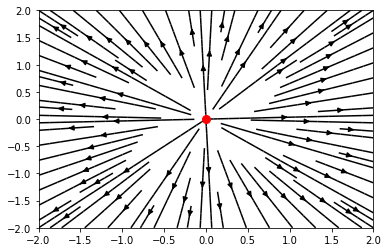

In [8]:
x0 , x1 = -2, 2
y0 , y1 = -2, 2
x = linspace(x0, x1, 64)
y = linspace(y0, y1, 64)
x,y = meshgrid(x, y)
Ex, Ey = E_total(x, y, charges)
streamplot(x, y, Ex, Ey, color = 'k')

for C in charges:
    if C.q>0:
        plot(C.pos[0], C.pos[1], 'ro', ms = 8*sqrt(C.q))
    if C.q<0:
        plot(C.pos[0], C.pos[1], 'bo', ms = 8*sqrt(-C.q))

Für manche Aufgaben kann es hilfreich sein, die Stärke des elektrischen Feldes für einen Bestimmten Ort auszugeben. Die definierten Funktionen lassen sich auch einzeln abrufen.   

In [9]:
E_total(1.5, 0.05, charges)

[0.44370473117831494, 0.014790157705943831]

### Beispiel 2: Dipol-Feld

In [10]:
charges1 = [charge(1, [0, 0]), charge(-1, [0.5,0])]

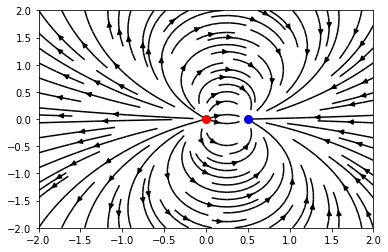

In [11]:
x0 , x1 = -2, 2
y0 , y1 = -2, 2
x = linspace(x0, x1, 64)
y = linspace(y0, y1, 64)
x,y = meshgrid(x, y)
Ex, Ey = E_total(x, y, charges1)
streamplot(x, y, Ex, Ey, color = 'k')

for C in charges1:
    if C.q>0:
        plot(C.pos[0], C.pos[1], 'ro', ms = 8*sqrt(C.q))
    if C.q<0:
        plot(C.pos[0], C.pos[1], 'bo', ms = 8*sqrt(-C.q))

Nutzen Sie die gegebenen Code-Schnipsel, um die folgenden Aufgaben zu bearbeiten.   

### Aufgabe 1

Drei Punktladungen, $+q_0$, $+q$ und $-q$, befinden sich in den Ecken eines gleichseitigen Dreiecks. Es befinden sich keine anderen geladenen Körper in der Nähe. 
* a) Gibt es Orte, an denen das elektrische Feld den Betrag null annimmt?
* b) In welche Richtung wirkt auf die Ladung $+q_0$ die resultierende Kraft, die durch die anderen beiden Ladungen verursacht wird?

<img src="Tipler_18.4.png" alt="drawing" width="200px"/>

In [20]:
charges2 = [charge(1, [0, 0]), charge(-1, [1,0])]

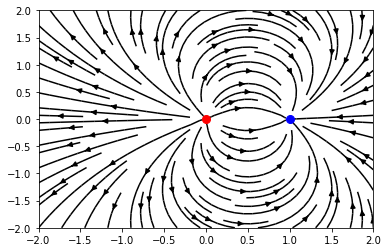

In [21]:
x0 , x1 = -2, 2
y0 , y1 = -2, 2
x = linspace(x0, x1, 64)
y = linspace(y0, y1, 64)
x,y = meshgrid(x, y)
Ex, Ey = E_total(x, y, charges2)
streamplot(x, y, Ex, Ey, color = 'k')

for C in charges2:
    if C.q>0:
        plot(C.pos[0], C.pos[1], 'ro', ms = 8*sqrt(C.q))
    if C.q<0:
        plot(C.pos[0], C.pos[1], 'bo', ms = 8*sqrt(-C.q))

### Aufgabe 2

Vier Ladungen befinden sich in den Ecken eines Quadrats. Es befinden sich keine anderen geladenen körper in der Nähe. Welche der folgenden Aussagen ist richtig? 
* a) Das elektrische Feld $E$ ist null in allen punkten in der Mitte zwischen zwei Ladungen längs der Seiten des Quadrats.
* b) $E$ ist null im Mittelpunkt des Quadrats.
* c) $E$ ist null in der Mitte zwischen den beiden oberen und in der Mitte zwischen den beiden unteren Ladungen.

<img src="Tipler_18.5.png" alt="drawing" width="200px"/>

### Aufgabe 3

Zwei Punktladungen, $+q$ und $-3q$, sind durch einen kleinen Abstand $d$ voneinander getrennt. 
* a) Veranschaulichen Sie mit elektrischen Feldlinien das elektrische Feld in er Nähe dieser Anordnung
* b) Zeichnen Sie auch die Feldlinien bei Abständen, die viel gößer als der Abstand der ladungen sind. 

### Aufgabe 4

Zwei Moleküle haben Dipolmomente mit gleichem Betrag, sind aber auf vier verschiedenen Arten orientiert (siehe Abbildung). Bestimmen Sie jeweils die Richtung des elektrischen Felds in den durch die Nummern gekennzeichneten punkten. Erläutern sie Ihre Antworten. 

<img src="Tipler_18.9.png" alt="drawing" width="300px"/>